# __Explorar datos preprocesados__

In [1]:
# visualizacion de informacion
%matplotlib inline
import pandas as pd

In [2]:
# cargar datos preprocesados
compras_df = pd.read_csv('../data_out/clean_compras.csv')
compras_df.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Visualizacion general del dataset

In [3]:
# lista de nombre de las columnas
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [4]:
# comprobar el tipo de dato de las variables
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [5]:
# resumen estadistico de las variables numericas
compras_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [6]:
# resumen estadistico de las variables categoricas
compras_df.describe(include='object')

,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,FECHA,SHEET
count,1540,1540,1540,1540,1540,1540,1540,1540
unique,301,301,1540,656,1396,2,21,5
top,CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUC...,CMI970416U95,LLS AF8458-158008-3972,NO APLICA,SERVICIOS FUNERARIOS ASISTENCIA SOCIAL DIF,TR,2020-12-04,CONTRATISTAS Y FDO FED
freq,266,266,1,238,27,1395,521,724


In [7]:
# seleccionar variables con las que vamos a trabajar
compras_df = compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET']]

## Analisis unidimensional de las variables

In [8]:
# conteo de los valores de SHEET
compras_df['SHEET'].value_counts()

CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: SHEET, dtype: int64

In [9]:
# valores unicos de la variable CONCEPTO
len(compras_df['CONCEPTO'].unique())

1396

In [10]:
# primero 10 valores de la variable BENEFICIARIO
compras_df['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

<AxesSubplot:>

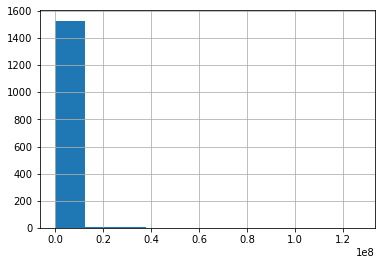

In [11]:
# comportamiento del IMPORTE
compras_df['IMPORTE'].hist()

<AxesSubplot:>

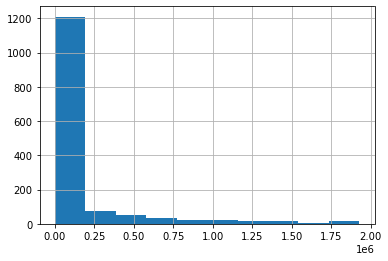

In [12]:
# obtener solo los valores centrales de IMPORTE
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<AxesSubplot:>

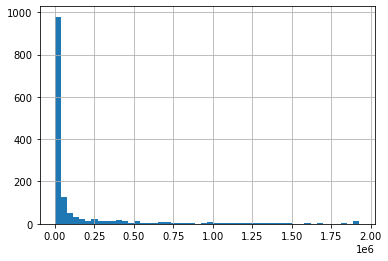

In [13]:
# obtener solo los valores centrales de IMPORTE
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [14]:
# obtener los primeros registros filtrados
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)].head()

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Analisis multidimensional de las variables

In [15]:
# proveedores o beneficiarios con pagos mas grandes
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']
sum_importe_beneficiario

BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64

<AxesSubplot:ylabel='BENEFICIARIO'>

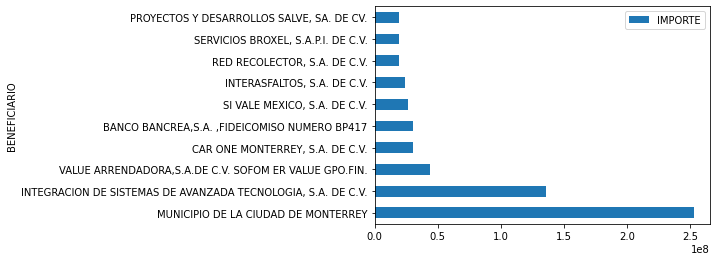

In [17]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(
        kind='barh', 
        x='BENEFICIARIO', 
        y='IMPORTE'
        )

In [18]:
# gasto promedio por hoja
mean_importe_sheet = compras_df.groupby('SHEET').mean()['IMPORTE']
mean_importe_sheet

SHEET
COMUNICACION              109705.343662
CONTRATISTAS Y FDO FED    474566.765787
GASTOS VARIOS             881659.731797
SERV PPROF                229592.166667
SERV. PERS.                59623.405217
Name: IMPORTE, dtype: float64

<AxesSubplot:ylabel='SHEET'>

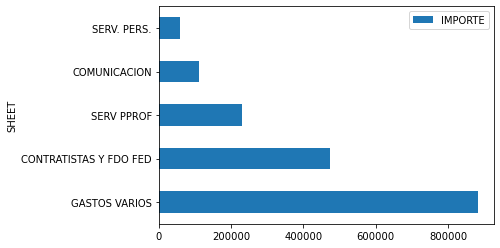

In [21]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).plot(
    kind='barh',
    x='SHEET',
    y='IMPORTE'
)

## Analisis de texto